In [ ]:
from datetime import datetime

ss = [
    37.90410909999999,
    13.576500950000002,
    0.01151335,
    0.0027293499999999997,
    0.0029394,
]


print([datetime.fromtimestamp(s).strftime("%M:%S:%f") for s in ss])

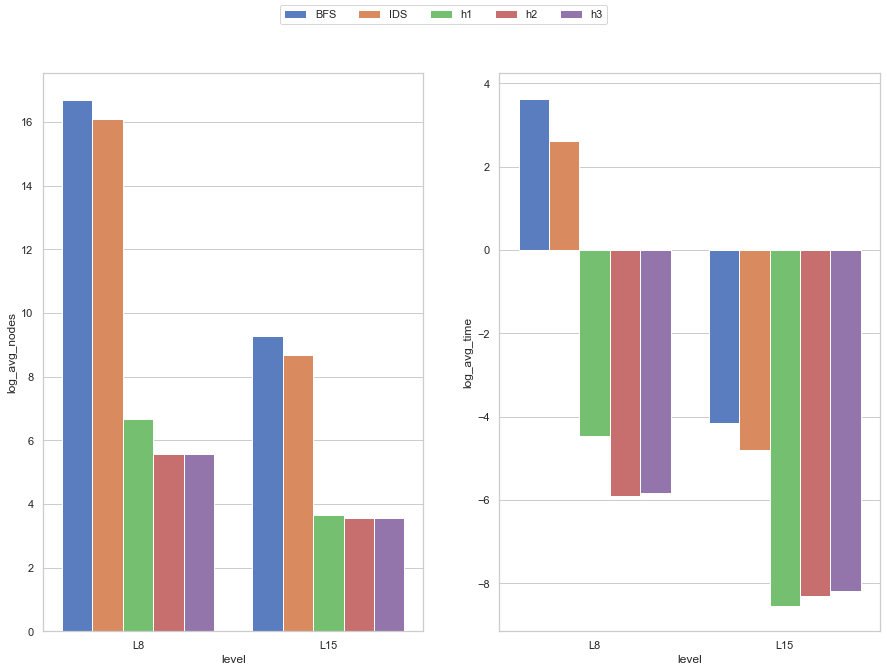

In [28]:
import pandas as pd
import numpy as np

data = {
    "L8": {
        "BFS": (17811804.2, "00:37:904109"),
        "IDS": (9835777.35, "00:13:576501"),
        "h1": (789.25, "00:00:011513"),
        "h2": (263.6, "00:00:002729"),
        "h3": (262.8, "00:00:002939"),
    },
    "L15": {
        "BFS": (10552.8, "00:00:015644"),
        "IDS": (5820.8, "00:00:008186"),
        "h1": (38.65, "00:00:000194"),
        "h2": (35.2, "00:00:000245"),
        "h3": (34.8, "00:00:000275"),
    },
}

df = pd.DataFrame(data)
df = df.stack().apply(pd.Series)
df.columns = ["avg_nodes", "avg_time"]
df = df.reset_index()
df = df.rename(columns={"level_0": "algorithm", "level_1": "level"})
df
df["avg_time"] = df["avg_time"].apply(
    lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]) + int(x.split(":")[2]) / 1000000
)
# compute log of avg_nodes and avg_time
df["log_avg_nodes"] = df["avg_nodes"].apply(lambda x: np.log(x))
df["log_avg_time"] = df["avg_time"].apply(lambda x: np.log(x))

# plot histograms for each level and color by algorithm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)

# Plot the log of avg_nodes
sns.barplot(
    x="level",
    y="log_avg_nodes",
    hue="algorithm",
    data=df,
    palette="muted",
    ax=axes[0],
);

# Plot the total time
sns.barplot(
    x="level",
    y="log_avg_time",
    hue="algorithm",
    data=df,
    palette="muted",
    ax=axes[1],
);

# keep only one legend
handles, labels = axes[0].get_legend_handles_labels()
f.legend(handles, labels, loc="upper center", ncol=5)

# remove spacing between legend and subplots
f.subplots_adjust(top=0.9)

# remove legends from subplots
axes[0].get_legend().remove()
axes[1].get_legend().remove()